# Práctica 2 - Parte 3: Modelo de horno eléctrico

En esta parte trabajaremos con un modelo simplificado de un horno eléctrico, como el que hemos visto en la teoría. El objetivo es comprender cómo evoluciona la temperatura y cómo se puede diseñar una ley de control para alcanzar un valor deseado.

---

## Enunciado general

1. Implementa en Python el modelo simplificado de un horno eléctrico representado como un sistema dinámico de primer orden.
2. Representa gráficamente la evolución de la temperatura para una entrada de potencia constante.
3. Diseña una ley de control sencilla que permita alcanzar una temperatura deseada $T_d$.
4. Analiza y discute el comportamiento obtenido.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Ejercicio 1

Implementa el modelo del horno eléctrico como un sistema dinámico de primer orden:

$
\dot{T}(t) = -a (T(t) - T_{amb}) + b u(t)
$

donde:
- $T(t)$ es la temperatura interna del horno,
- $T_{amb}$ es la temperatura ambiente,
- $u(t)$ es la potencia de entrada,
- $a>0$ y $b>0$ son parámetros del sistema.

Simula la evolución de $T(t)$ cuando $u(t)$ es constante y representa la gráfica.

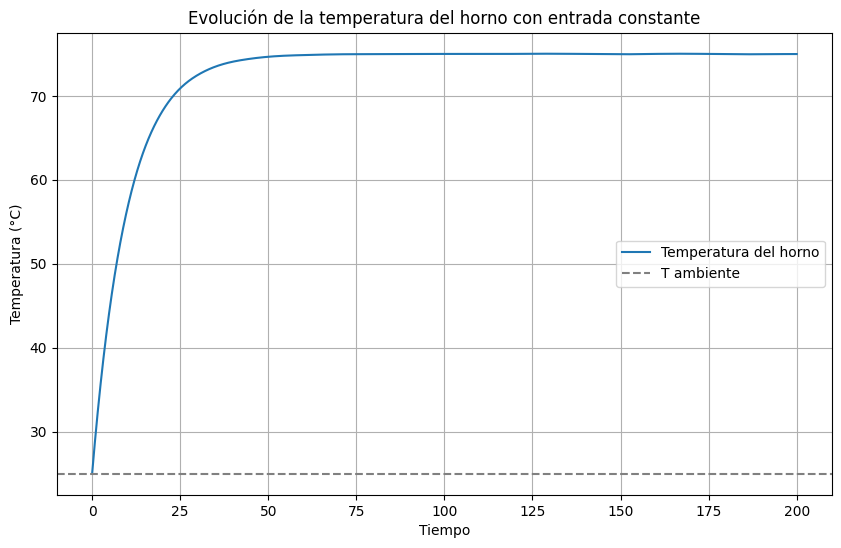

In [2]:
# Parámetros
a = 0.1
b = 0.5
T_amb = 25
u_const = 10
T0 = 25

def horno(t, T, a, b, u, T_amb):
    return -a*(T - T_amb) + b*u

t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(horno, t_span, [T0], t_eval=t_eval, args=(a, b, u_const, T_amb))

plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], label="Temperatura del horno")
plt.axhline(T_amb, color="gray", linestyle="--", label="T ambiente")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura (°C)")
plt.title("Evolución de la temperatura del horno con entrada constante")
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 2

Diseña una **ley de control** que lleve al horno a una temperatura deseada $T_d$. Una ley de control sencilla para $u(t)$ puede ser del tipo proporcional:

Simula y representa el comportamiento del horno con este control. Y marca con una línea discontinua la temperatura deseada.

## Preguntas de reflexión

1. ¿Cómo cambia el comportamiento del horno cuando se usa una entrada constante frente a una ley de control proporcional?
2. ¿Qué ocurre si la ganancia $k_p$ es muy pequeña? ¿Y si es demasiado grande?
3. ¿Qué diferencias observas entre la temperatura ambiente, la deseada y la alcanzada en cada caso?
4. ¿Cómo se relaciona este ejemplo con la noción de estabilidad vista en teoría?


## Ejercicio opcional: Control PID

Además del control proporcional, se puede utilizar un **control PID (Proporcional–Integral–Derivativo)** para mejorar la respuesta del horno.

La ley de control PID se expresa como:

$
u(t) = k_p e(t) + k_i \int e(t) dt + k_d \frac{de(t)}{dt}
$

donde $e(t) = T_d - T(t)$ es el error.

1. Implementa un controlador PID sencillo para el horno.
2. Simula y compara los resultados con el control proporcional.
